In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import ast

In [2]:
df = pd.read_json('nuevos_datos.json')

Estructura y detalles del dataframe

In [3]:
df.shape

(32135, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32135 entries, 0 to 32134
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        28852 non-null  object
 1   app_name      32133 non-null  object
 2   release_date  29783 non-null  object
 3   specs         31465 non-null  object
 4   price         30758 non-null  object
 5   early_access  32135 non-null  bool  
 6   sentiment     24953 non-null  object
 7   metascore     2677 non-null   object
dtypes: bool(1), object(7)
memory usage: 2.0+ MB


In [5]:
df.columns

Index(['genres', 'app_name', 'release_date', 'specs', 'price', 'early_access',
       'sentiment', 'metascore'],
      dtype='object')

Valores faltantes por columna

In [6]:
df.isna().sum() 

genres           3283
app_name            2
release_date     2352
specs             670
price            1377
early_access        0
sentiment        7182
metascore       29458
dtype: int64

In [7]:
df.describe()

,genres,app_name,release_date,specs,price,early_access,sentiment,metascore
count,28852,32133,29783,31465,30758.00,32135,24953,2677
unique,883,32094,3457,4649,162.00,2,18,71
top,[Action],Soundtrack,2012-10-16,[Single-player],4.99,False,Mixed,80
freq,1880,3,100,2794,4278.00,30188,4103,125


Hacemos una copia del dataframe original para trabajar sobre el mismo

In [8]:
df_eda = df[['genres','app_name','release_date','specs','price','early_access','sentiment', 'metascore']].copy()

In [9]:
df_eda['release_date'] = pd.to_datetime(df_eda["release_date"], errors='coerce')
df_eda['metascore'] = pd.to_numeric(df_eda['metascore'], errors='coerce')

In [10]:
df_eda.head()

,genres,app_name,release_date,specs,price,early_access,sentiment,metascore
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,[Single-player],4.99,False,None,NaN
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,"[Single-player, Multi-player, Online Multi-Pla...",Free To Play,False,Mostly Positive,NaN
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,"[Single-player, Multi-player, Online Multi-Pla...",Free to Play,False,Mostly Positive,NaN
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,[Single-player],0.99,False,None,NaN
4,None,Log Challenge,NaT,"[Single-player, Full controller support, HTC V...",2.99,False,None,NaN


In [11]:
df_eda.dropna(subset=['metascore'], inplace = True)

In [12]:
df_eda.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2607 entries, 28 to 32117
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        2545 non-null   object        
 1   app_name      2607 non-null   object        
 2   release_date  2545 non-null   datetime64[ns]
 3   specs         2603 non-null   object        
 4   price         2584 non-null   object        
 5   early_access  2607 non-null   bool          
 6   sentiment     2586 non-null   object        
 7   metascore     2607 non-null   float64       
dtypes: bool(1), datetime64[ns](1), float64(1), object(5)
memory usage: 165.5+ KB


Histograma de frecuencia de la columna genres

In [13]:
# Crear una lista para almacenar todos los géneros
all_genres = []

# Iterar a través de las listas de géneros y agregar cada género a la lista
for genres_list in df_eda['genres']:
    if genres_list is not None:  # Verificar si la lista de géneros no es nula
        all_genres.extend(genres_list)

# Crear una tabla de frecuencia de géneros
genre_frequency = pd.Series(all_genres).value_counts()

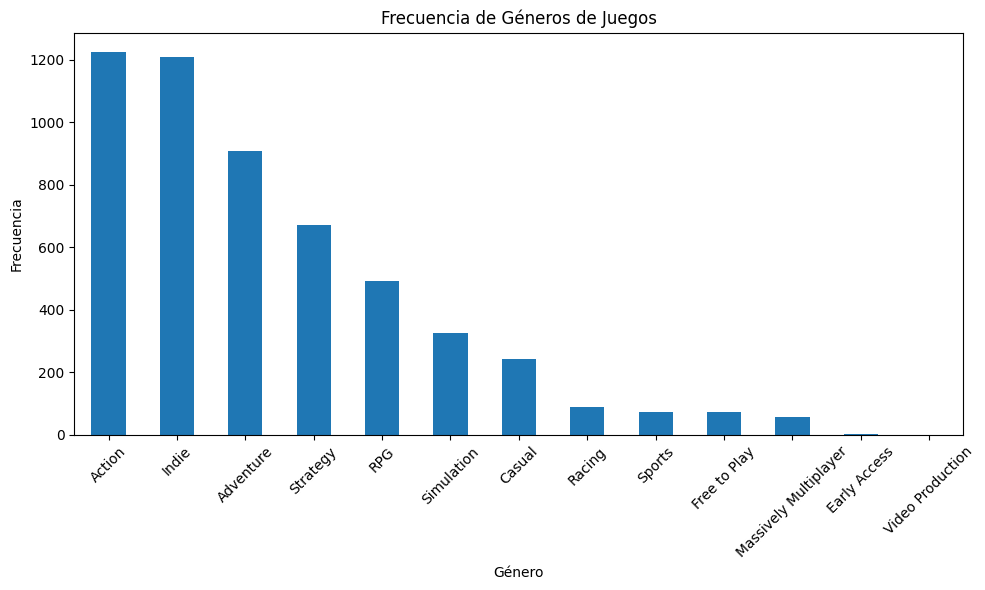

In [14]:
# Generar un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
genre_frequency.plot(kind='bar')  # Tipo de gráfico de barras
plt.title('Frecuencia de Géneros de Juegos')  # Título del gráfico
plt.xlabel('Género')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de las etiquetas en el eje x
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()  # Mostrar el gráfico

In [15]:
df_eda['app_name'].value_counts()

app_name
Wolfenstein II: The New Colossus                  2
Altitude                                          2
Warhammer Quest                                   2
Batman: Arkham City - Game of the Year Edition    2
Kromaia                                           1
                                                 ..
Fragments of Him                                  1
Battleborn                                        1
TransOcean 2: Rivals                              1
Goliath                                           1
Counter-Strike: Condition Zero                    1
Name: count, Length: 2603, dtype: int64

In [16]:
df_eda['release_date'].value_counts()

release_date
2015-05-26    8
2013-09-05    8
2017-09-21    7
2016-07-12    7
2016-08-30    7
             ..
1999-11-18    1
2016-08-16    1
2016-08-11    1
2016-08-10    1
2004-03-01    1
Name: count, Length: 1643, dtype: int64

In [17]:
# Crear una lista para almacenar todos los géneros
all_specs = []

# Iterar a través de las listas de géneros y agregar cada género a la lista
for specs_list in df_eda['specs']:
    if specs_list is not None:  # Verificar si la lista de géneros no es nula
        all_specs.extend(specs_list)

# Crear una tabla de frecuencia de géneros
specs_frequency = pd.Series(all_specs).value_counts()

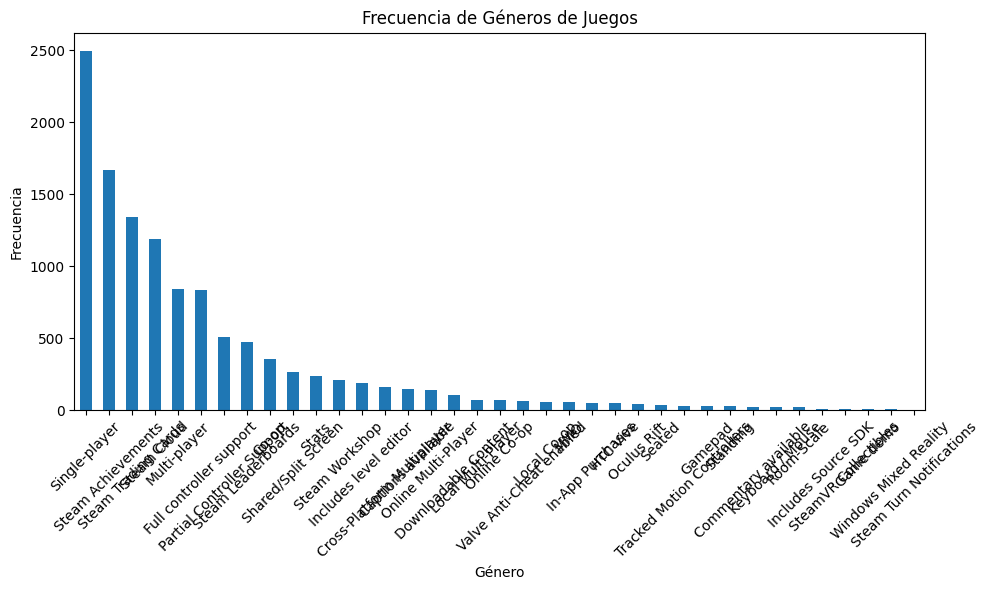

In [18]:
# Generar un gráfico de barras
plt.figure(figsize=(10, 6))  # Tamaño del gráfico
specs_frequency.plot(kind='bar')  # Tipo de gráfico de barras
plt.title('Frecuencia de Géneros de Juegos')  # Título del gráfico
plt.xlabel('Género')  # Etiqueta del eje x
plt.ylabel('Frecuencia')  # Etiqueta del eje y
plt.xticks(rotation=45)  # Rotación de las etiquetas en el eje x
plt.tight_layout()  # Ajustar el diseño del gráfico
plt.show()  # Mostrar el gráfico

In [19]:
df_eda['early_access'].value_counts()

early_access
False    2605
True        2
Name: count, dtype: int64

In [20]:
df_eda['sentiment'].value_counts()

sentiment
Very Positive              1139
Mixed                       517
Mostly Positive             502
Overwhelmingly Positive     166
Positive                    119
Mostly Negative              54
2 user reviews               12
7 user reviews               10
1 user reviews               10
8 user reviews                9
3 user reviews                8
9 user reviews                8
6 user reviews                8
4 user reviews                7
5 user reviews                6
Very Negative                 5
Negative                      4
Overwhelmingly Negative       2
Name: count, dtype: int64

Grafico de series temporales de los cambios a lo largo del tiempo

In [21]:
date_counts = df_eda['release_date'].value_counts().sort_index()

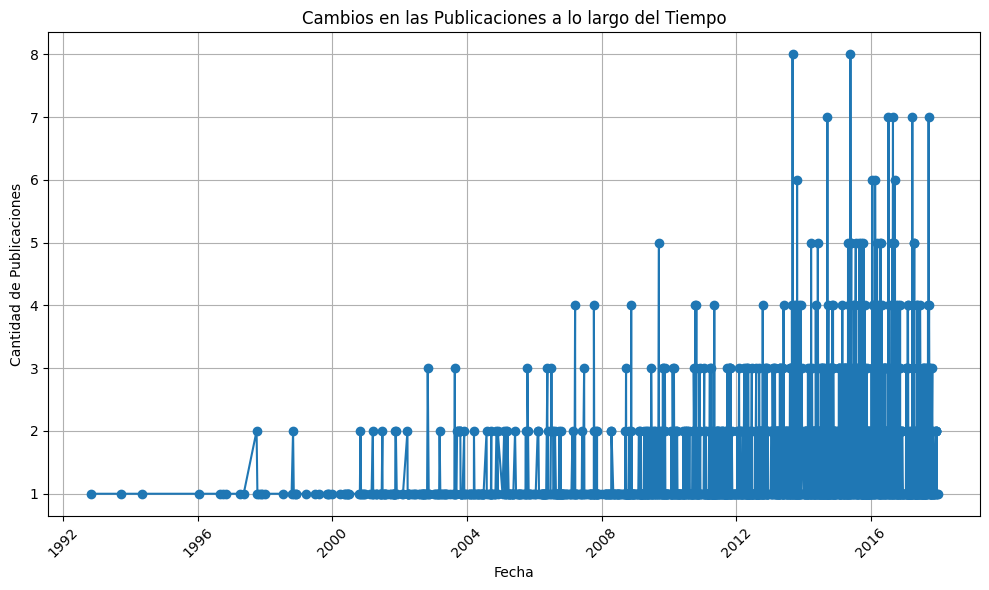

In [22]:
plt.figure(figsize=(10, 6))  # Tamaño del gráfico (opcional)
plt.plot(date_counts.index, date_counts.values, marker='o')
plt.title('Cambios en las Publicaciones a lo largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Publicaciones')
plt.grid(True)
plt.xticks(rotation=45)  # Rotación de las etiquetas del eje x (opcional)
plt.tight_layout()

# Muestra el gráfico
plt.show()

Histograma de precios

In [23]:
# Convertir la columna 'price' a valores numéricos
df_eda['price'] = pd.to_numeric(df_eda['price'], errors='coerce')

limpieza y analisis del dataframe a partir de df_eda

In [24]:
df_cleaned = df_eda.dropna(subset=['price'])

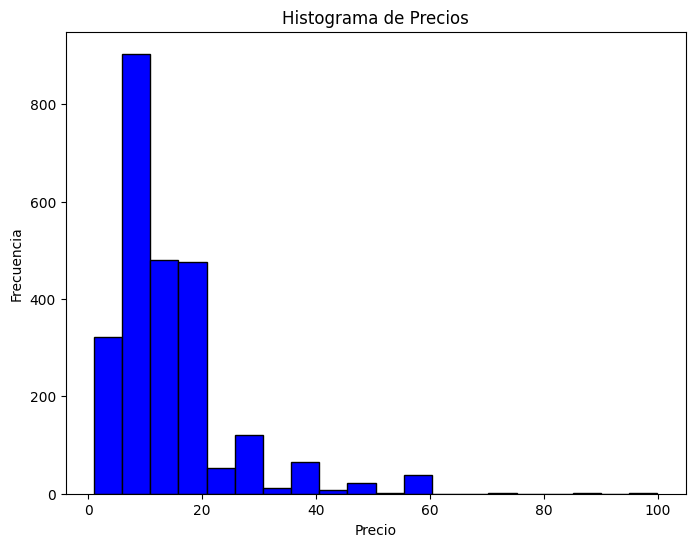

In [25]:
# Crear un histograma para la variable 'price'
plt.figure(figsize=(8, 6))
plt.hist(df_cleaned['price'], bins=20, color='blue', edgecolor='black')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.title('Histograma de Precios')
plt.show()

Histograma de metascore

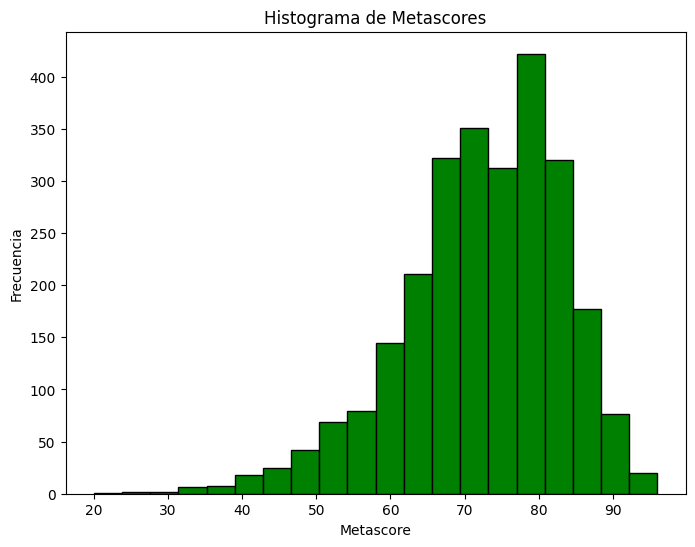

In [26]:
# Crear un histograma para la variable 'metascore'
plt.figure(figsize=(8, 6))
plt.hist(df_eda['metascore'], bins=20, color='green', edgecolor='black')
plt.xlabel('Metascore')
plt.ylabel('Frecuencia')
plt.title('Histograma de Metascores')
plt.show()

Grafico de densidad para price

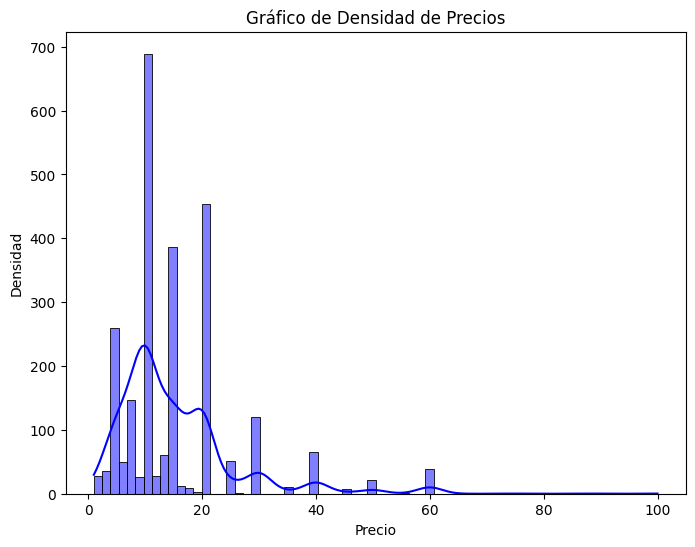

In [27]:
# Crear un gráfico de densidad para la variable 'price'
plt.figure(figsize=(8, 6))
sns.histplot(data=df_eda, x='price', kde=True, color='blue')
plt.xlabel('Precio')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Precios')
plt.show()

Grafico de densidad para metascore

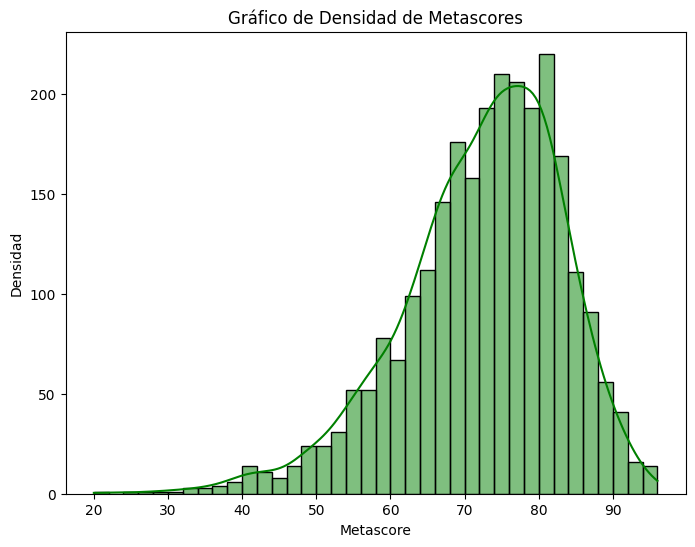

In [28]:
# Crear un gráfico de densidad para la variable 'metascore'
plt.figure(figsize=(8, 6))
sns.histplot(data=df_eda, x='metascore', kde=True, color='green')
plt.xlabel('Metascore')
plt.ylabel('Densidad')
plt.title('Gráfico de Densidad de Metascores')
plt.show()

Valores atipicos en price

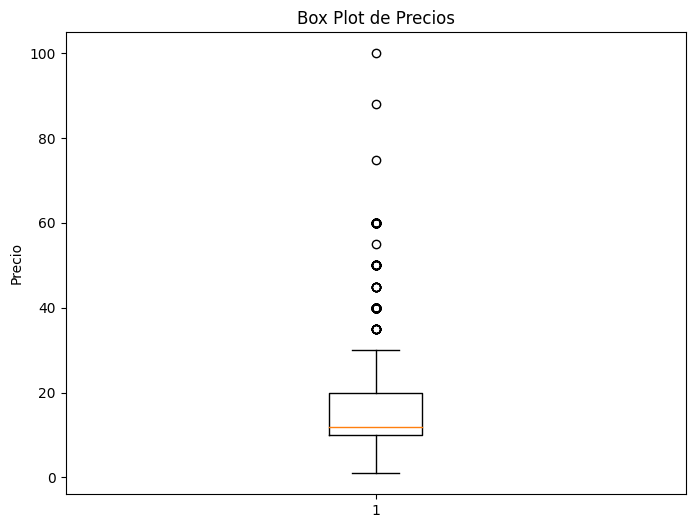

In [29]:
# Filtrar los datos de 'price' para valores menores a 100
filtered_prices = df_eda[df_eda['price'] < 100]['price']

# Crear un box plot para la variable 'price'
plt.figure(figsize=(8, 6))
plt.boxplot(filtered_prices)
plt.ylabel('Precio')
plt.title('Box Plot de Precios')
plt.show()

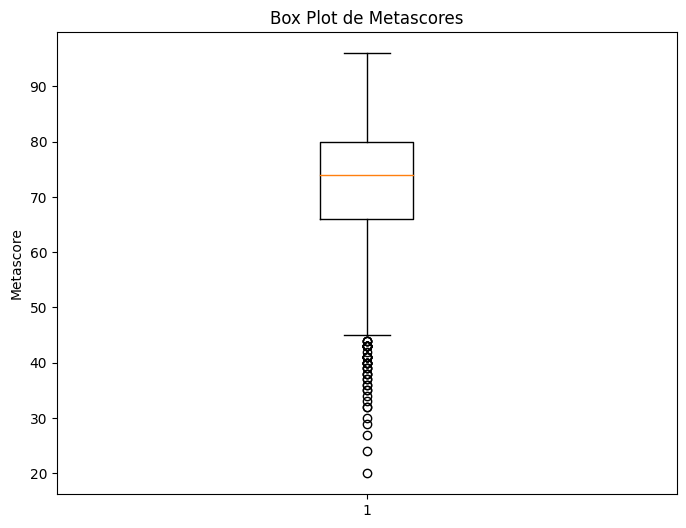

In [30]:
# Crear un box plot para la variable 'metascore'
plt.figure(figsize=(8, 6))
plt.boxplot(df_eda['metascore'])
plt.ylabel('Metascore')
plt.title('Box Plot de Metascores')
plt.show()

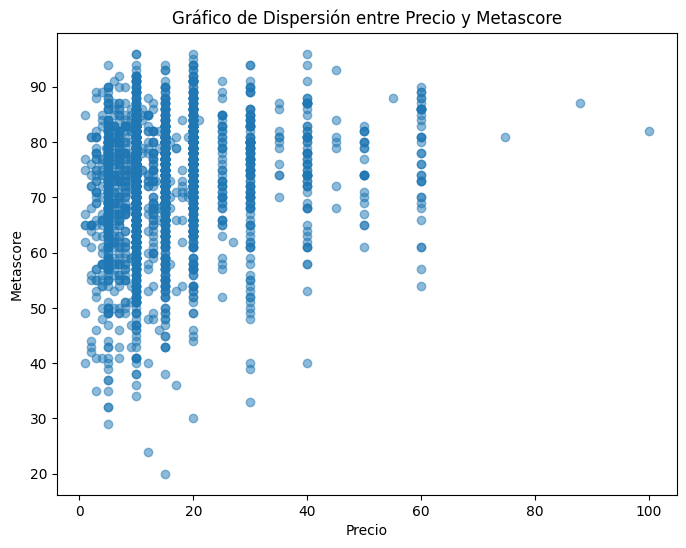

In [31]:
# Crear un gráfico de dispersión entre 'price' y 'metascore'
plt.figure(figsize=(8, 6))
plt.scatter(df_eda['price'], df_eda['metascore'], alpha=0.5)
plt.xlabel('Precio')
plt.ylabel('Metascore')
plt.title('Gráfico de Dispersión entre Precio y Metascore')
plt.show()

In [32]:
# Filtrar filas con valores no nulos en la columna 'sentiment'
df_filtered = df_eda.dropna(subset=['sentiment'])

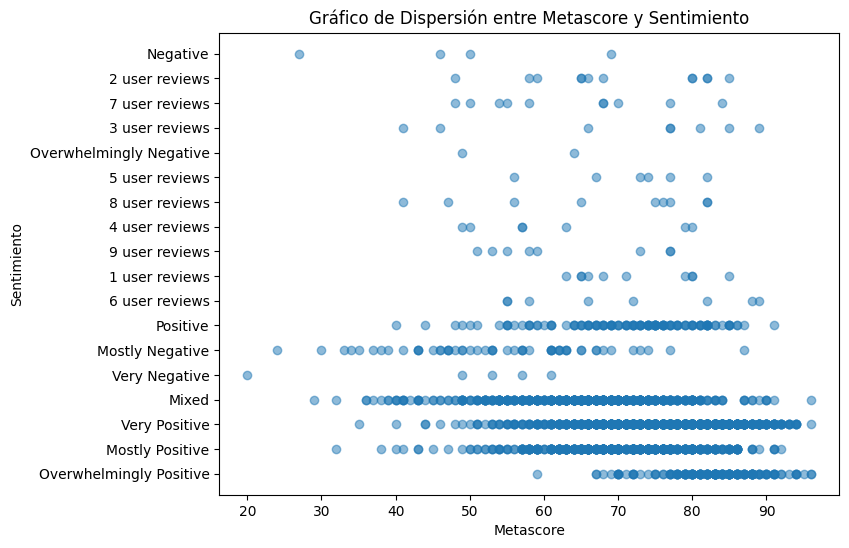

In [33]:
# Crear un gráfico de dispersión entre 'metascore' y 'sentiment' en el DataFrame filtrado
plt.figure(figsize=(8, 6))
plt.scatter(df_filtered['metascore'], df_filtered['sentiment'], alpha=0.5)
plt.xlabel('Metascore')
plt.ylabel('Sentimiento')
plt.title('Gráfico de Dispersión entre Metascore y Sentimiento')
plt.show()

In [34]:
df_cleaned = df_eda.drop_duplicates(subset=['app_name'])

In [35]:
# Rellenar valores faltantes en la columna 'price' con la mediana
median_price = df_eda['price'].median()
df_cleaned['price'].fillna(median_price, inplace=True)

C:\Users\carlo\AppData\Local\Temp\ipykernel_19112\402752068.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['price'].fillna(median_price, inplace=True)


In [36]:
# Rellenar valores faltantes en la columna 'sentiment' con el valor más común
mode_sentiment = df_eda['sentiment'].mode()[0]
df_cleaned['sentiment'].fillna(mode_sentiment, inplace=True)

C:\Users\carlo\AppData\Local\Temp\ipykernel_19112\3179404148.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['sentiment'].fillna(mode_sentiment, inplace=True)


In [37]:
df_cleaned['release_date'] = pd.to_datetime(df_cleaned["release_date"], errors='coerce')
df_cleaned['metascore'] = pd.to_numeric(df_cleaned['metascore'], errors='coerce')

C:\Users\carlo\AppData\Local\Temp\ipykernel_19112\2904905909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['release_date'] = pd.to_datetime(df_cleaned["release_date"], errors='coerce')
C:\Users\carlo\AppData\Local\Temp\ipykernel_19112\2904905909.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['metascore'] = pd.to_numeric(df_cleaned['metascore'], errors='coerce')


In [38]:
# Crear una nueva columna 'year' a partir de la columna 'release_date'
df_cleaned['year'] = df_cleaned['release_date'].dt.year

C:\Users\carlo\AppData\Local\Temp\ipykernel_19112\2128222619.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['year'] = df_cleaned['release_date'].dt.year


In [39]:
from wordcloud import WordCloud

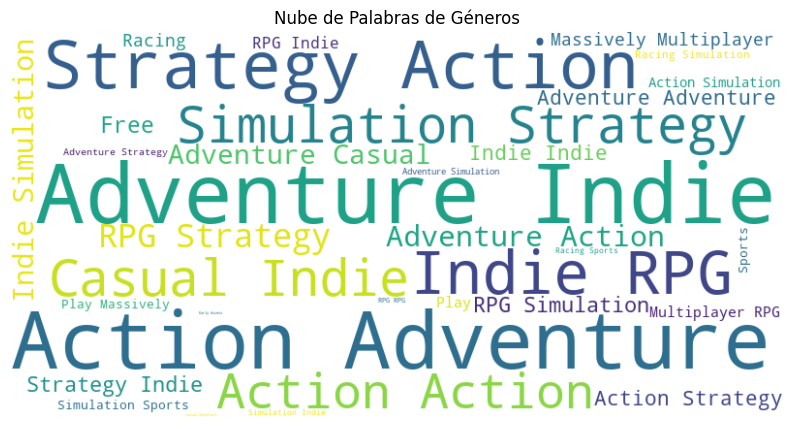

In [40]:
# Crear una lista para almacenar todos los géneros
all_genres = []

# Iterar a través de las listas de géneros y agregar cada género a la lista
for genres_list in df_cleaned['genres']:
    if genres_list is not None:
        all_genres.extend(genres_list)

# Verificar si hay géneros para crear la nube de palabras
if all_genres:
    # Convertir la lista de géneros en una cadena de texto
    genres_text = ' '.join(all_genres)

    # Crear la nube de palabras
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

    # Mostrar la nube de palabras
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title('Nube de Palabras de Géneros')
    plt.show()
else:
    print("No se encontraron géneros para crear la nube de palabras.")

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Prediccion de precios (ML)

In [42]:
# Eliminar las filas con valores no numéricos en la columna 'metascore'
df_cleaned = df_cleaned[pd.to_numeric(df_cleaned['price'], errors='coerce').notnull()]

# Convertir la columna 'metascore' a números flotantes
df_cleaned['price'] = df_cleaned['price'].astype(float)

In [43]:
# Eliminar filas con valores faltantes
df_cleaned = df_cleaned.dropna(subset=[ 'year', 'metascore', 'price'])

In [44]:
def prediccion(año, metascore):
    # Filtrar el DataFrame por año y metascore
    data = df_cleaned[(df_cleaned['year'] == año) & (df_cleaned['metascore'] == metascore)]

    if data.empty:
        return None, None, "No se encontraron datos para los parámetros proporcionados"

    # Dividir los datos en características (X) y variable objetivo (y)
    X = data[['year', 'metascore']]
    y = data['price']

    # Dividir los datos en conjunto de entrenamiento y conjunto de prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Crear y entrenar el modelo de regresión lineal
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Realizar predicciones en el conjunto de prueba
    y_pred = model.predict(X_test)

    # Calcular el RMSE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    return model.predict([[año, metascore]])[0], rmse, None